In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
data_trn = tf.keras.preprocessing.image_dataset_from_directory("../Images/XO",labels="inferred",validation_split=0.2,subset="training",seed=10)
data_val = tf.keras.preprocessing.image_dataset_from_directory("../Images/XO",labels="inferred",validation_split=0.2,subset="validation",seed=4)

class_names = data_trn.class_names
print(class_names)

num_classes = len(class_names)

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model.summary()

Found 32 files belonging to 2 classes.
Using 26 files for training.
Found 32 files belonging to 2 classes.
Using 6 files for validation.
['0', '1']


In [4]:
epochs = 30
history = model.fit(
  data_trn,
  validation_data=data_val,
  epochs=epochs
)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.8471 - accuracy: 0.4615 - val_loss: 15.9338 - val_accuracy: 0.3333
Epoch 2/30
1/1 [==============================] - 1s 823ms/step - loss: 10.9920 - accuracy: 0.5385 - val_loss: 7.9238 - val_accuracy: 0.3333
Epoch 3/30
1/1 [==============================] - 1s 808ms/step - loss: 5.4677 - accuracy: 0.5385 - val_loss: 0.7239 - val_accuracy: 0.3333
Epoch 4/30
1/1 [==============================] - 1s 816ms/step - loss: 0.6781 - accuracy: 0.5385 - val_loss: 0.7989 - val_accuracy: 0.6667
Epoch 5/30
1/1 [==============================] - 1s 799ms/step - loss: 1.2116 - accuracy: 0.4615 - val_loss: 0.7192 - val_accuracy: 0.6667
Epoch 6/30
1/1 [==============================] - 1s 795ms/step - loss: 1.0492 - accuracy: 0.4615 - val_loss: 0.6520 - val_accuracy: 0.6667
Epoch 7/30
1/1 [==============================] - 1s 793ms/step - loss: 0.8742 - accuracy: 0.4615 - val_loss: 0.6486 - val_accuracy: 0.6667
Epoch 8/30
1/1 [=====

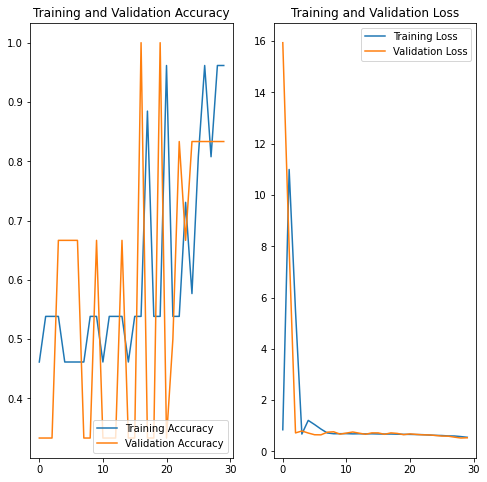

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
img = tf.keras.utils.load_img(
    "../Images/Tests/14.png", target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(tf.nn.softmax(predictions)*100)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(data_trn.class_names[np.argmax(score)], 100 * np.max(score))
)

tf.Tensor([[47.263588 52.736412]], shape=(1, 2), dtype=float32)
This image most likely belongs to 1 with a 52.74 percent confidence.


In [9]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "../Models/XO_3")